<a href="https://colab.research.google.com/github/Falli007/SentimentAnalysis/blob/main/Book_Genre_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import re
import nltk
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import metrics
from sklearn.svm import SVC




In [2]:
books = pd.read_csv('BooksDataSet.csv')

In [3]:
books.head()

,Unnamed: 0,book_id,book_name,genre,summary
0,0,3248537,Drowned Wednesday,Fantasy,Drowned Wednesday is the first Trustee among ...
1,1,27796919,The Lost Hero,Fantasy,"As the book opens, Jason awakens on a school ..."
2,2,3910776,The Eyes of the Overworld,Fantasy,Cugel is easily persuaded by the merchant Fia...
3,3,5969644,Magic's Promise,Fantasy,The book opens with Herald-Mage Vanyel return...
4,4,3173445,Taran Wanderer,Fantasy,Taran and Gurgi have returned to Caer Dallben...


In [4]:
#removing the unamed: 0

books = books[['book_id', 'book_name', 'genre', 'summary']]
books.head(4)

,book_id,book_name,genre,summary
0,3248537,Drowned Wednesday,Fantasy,Drowned Wednesday is the first Trustee among ...
1,27796919,The Lost Hero,Fantasy,"As the book opens, Jason awakens on a school ..."
2,3910776,The Eyes of the Overworld,Fantasy,Cugel is easily persuaded by the merchant Fia...
3,5969644,Magic's Promise,Fantasy,The book opens with Herald-Mage Vanyel return...


In [5]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   book_id    3000 non-null   int64 
 1   book_name  3000 non-null   object
 2   genre      3000 non-null   object
 3   summary    3000 non-null   object
dtypes: int64(1), object(3)
memory usage: 93.9+ KB


<ipython-input-6-7c7a8cec35bc>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.countplot(x = books['genre'], palette='plasma')


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Fantasy'),
  Text(1, 0, 'Science Fiction'),
  Text(2, 0, 'Crime Fiction'),
  Text(3, 0, 'Historical novel'),
  Text(4, 0, 'Horror'),
  Text(5, 0, 'Thriller')])

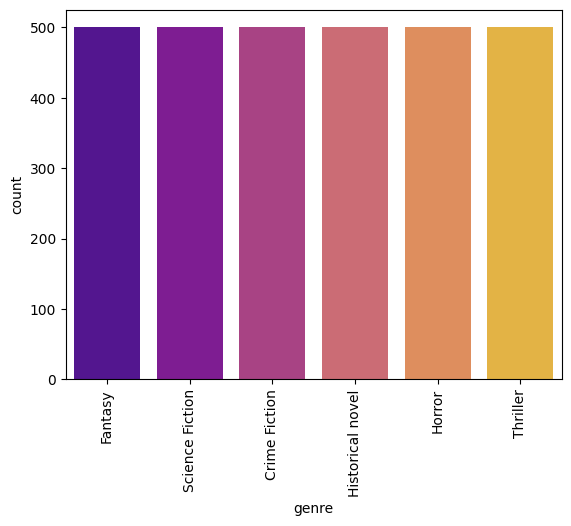

In [6]:
sn.countplot(x = books['genre'], palette='plasma')
plt.xticks(rotation=90)

In [7]:
books['summary'].iloc[1]

' As the book opens, Jason awakens on a school bus, unable to remember who or where he is, or anything about his past. He is sitting next to Piper McLean and Leo Valdez, who call him by name and say they are his girlfriend and best friend respectively. All three are part of a class field trip to the Grand Canyon, and after they arrive, a classmate Dylan turns into a Venti (Storm Spirit) and attacks the trio and their trip leader, Coach Gleeson Hedge. In the ensuing fight, Jason surprises everyone, including himself, when one of his coins turns into a sword which he uses to battle the storm spirits. Coach Hedge, who reveals himself to be a satyr during the fight, is taken captive by a fleeing spirit. After the battle, a flying chariot arrives to rescue the trio, but one of the people in it, Annabeth, is upset when she discovers that her missing boyfriend, Percy Jackson, is not there as she expected. Annabeth, seeking Percy, was told in a vision from the goddess Hera to look there for th

In [8]:
#cleaning the text
import re

def cleantext(text):
    # Removing backslashes explicitly
    text = re.sub(r"\\", "", text)

    # Removing quotes (single and double)
    text = re.sub(r"[\"']", "", text)

    # Removing special symbols except letters and spaces
    text = re.sub(r"[^a-zA-Z\s]", "", text)

    # Removing extra whitespaces
    text = ' '.join(text.split())

    # Convert text to lowercase
    text = text.lower()

    return text

books['summary'] = books['summary'].apply(lambda x: cleantext(x))
books['summary'].iloc[1]



'as the book opens jason awakens on a school bus unable to remember who or where he is or anything about his past he is sitting next to piper mclean and leo valdez who call him by name and say they are his girlfriend and best friend respectively all three are part of a class field trip to the grand canyon and after they arrive a classmate dylan turns into a venti storm spirit and attacks the trio and their trip leader coach gleeson hedge in the ensuing fight jason surprises everyone including himself when one of his coins turns into a sword which he uses to battle the storm spirits coach hedge who reveals himself to be a satyr during the fight is taken captive by a fleeing spirit after the battle a flying chariot arrives to rescue the trio but one of the people in it annabeth is upset when she discovers that her missing boyfriend percy jackson is not there as she expected annabeth seeking percy was told in a vision from the goddess hera to look there for the guy with one shoe but this 

Plotting the Most Frequest *Words*

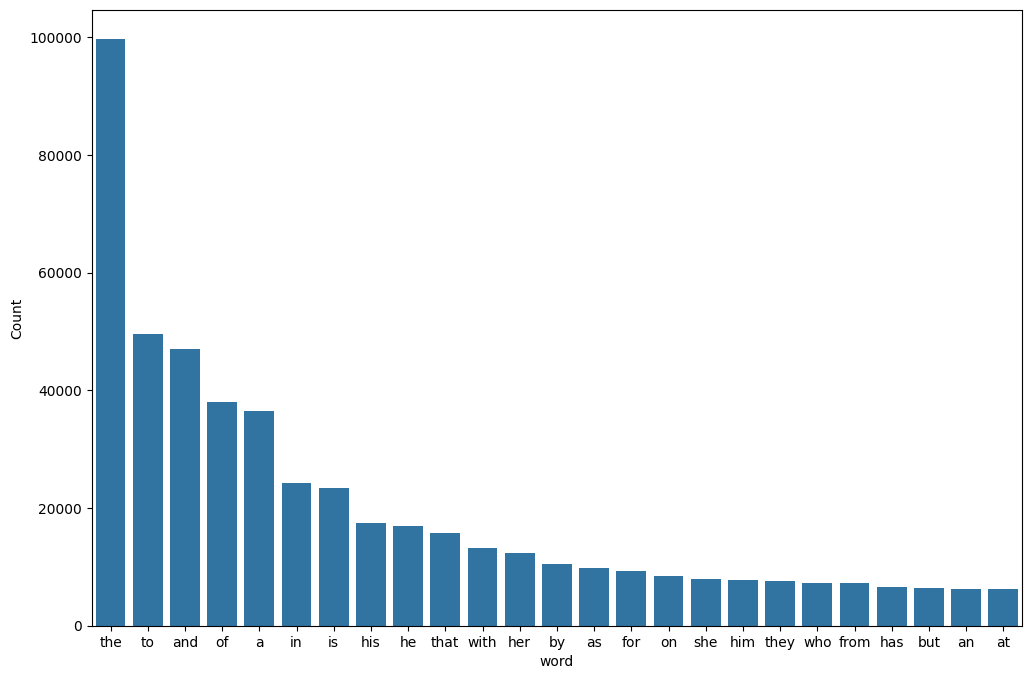

In [9]:
def showmostfrequentwords(text, no_of_words):

  allwords = ' '.join([char for char in text])
  allwords = allwords.split()
  fdlist = nltk.FreqDist(allwords)

  wordsdf = pd.DataFrame({'word':list(fdlist.keys()), 'count':list(fdlist.values())})

  df = wordsdf.nlargest(columns='count', n=no_of_words)

  plt.figure(figsize=(12,8))
  ax = sn.barplot(data=df, x='word', y='count')
  ax.set(ylabel='Count')
  plt.show()

  return wordsdf


#25 most frequent words

wordsdf = showmostfrequentwords(books['summary'],25)

In [10]:
wordsdf.sort_values('count',ascending=False).head(10).style.background_gradient(cmap='plasma')

,word,count
3,the,99671
16,to,49585
13,and,47027
45,of,37950
22,a,36546
79,in,24321
2,is,23347
48,his,17461
50,he,16952
37,that,15830


Removing the stopwords

In [11]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

#removing stopwords

def removestopwords(text):


   removestopwords = [word for word in text.split() if word not in stop_words]
   return ' '.join(removestopwords)

books['summary'] = books['summary'].apply(lambda x: removestopwords(x))
books['summary'].iloc[1]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


'book opens jason awakens school bus unable remember anything past sitting next piper mclean leo valdez call name say girlfriend best friend respectively three part class field trip grand canyon arrive classmate dylan turns venti storm spirit attacks trio trip leader coach gleeson hedge ensuing fight jason surprises everyone including one coins turns sword uses battle storm spirits coach hedge reveals satyr fight taken captive fleeing spirit battle flying chariot arrives rescue trio one people annabeth upset discovers missing boyfriend percy jackson expected annabeth seeking percy told vision goddess hera look guy one shoe turns jason shoe destroyed fight jason piperand leo told demigods taken back camp halfblood meet greek demigod children like leo revealed son hephaestus piper daughter aphrodite jason son zeus though hera tells champion jason later discovers full brother zeuss demigod daughter thalia grace hunter artemis shortly arrive three given quest rescue hera captured set soon 

Lemmatising

In [13]:
nltk.download('wordnet',download_dir='./')





[nltk_data] Downloading package wordnet to ./...


True

In [14]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

lemma=WordNetLemmatizer()

def lematizing(sentence):
    stemSentence = ""
    for word in sentence.split():
      stem = lemma.lemmatize(word)
      stemSentence += stem
      stemSentence += " "
    stemSentence = stemSentence.strip()
    return stemSentence

books['summary'] = books['summary'].apply(lambda x: lematizing(x))


[nltk_data] Downloading package wordnet to /root/nltk_data...


Stemming

In [15]:
#Approach

from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

def stemming(sentence):

    stemmed_sentence = ""
    for word in sentence.split():
        stem = stemmer.stem(word)
        stemmed_sentence += stem
        stemmed_sentence += " "

    stemmed_sentence = stemmed_sentence.strip()
    return stemmed_sentence

books['summary'] = books['summary'].apply(lambda text: stemming(text))
books['summary'].iloc[1]




'book open jason awaken school bu unabl rememb anyth past sit next piper mclean leo valdez call name say girlfriend best friend respect three part class field trip grand canyon arriv classmat dylan turn venti storm spirit attack trio trip leader coach gleeson hedg ensu fight jason surpris everyon includ one coin turn sword us battl storm spirit coach hedg reveal satyr fight taken captiv flee spirit battl fli chariot arriv rescu trio one peopl annabeth upset discov miss boyfriend perci jackson expect annabeth seek perci told vision goddess hera look guy one shoe turn jason shoe destroy fight jason piperand leo told demigod taken back camp halfblood meet greek demigod child like leo reveal son hephaestu piper daughter aphrodit jason son zeu though hera tell champion jason later discov full brother zeu demigod daughter thalia grace hunter artemi shortli arriv three given quest rescu hera captur set soon discov enemi work order gaea overthrow god quest encount thalia hunter look perci thal

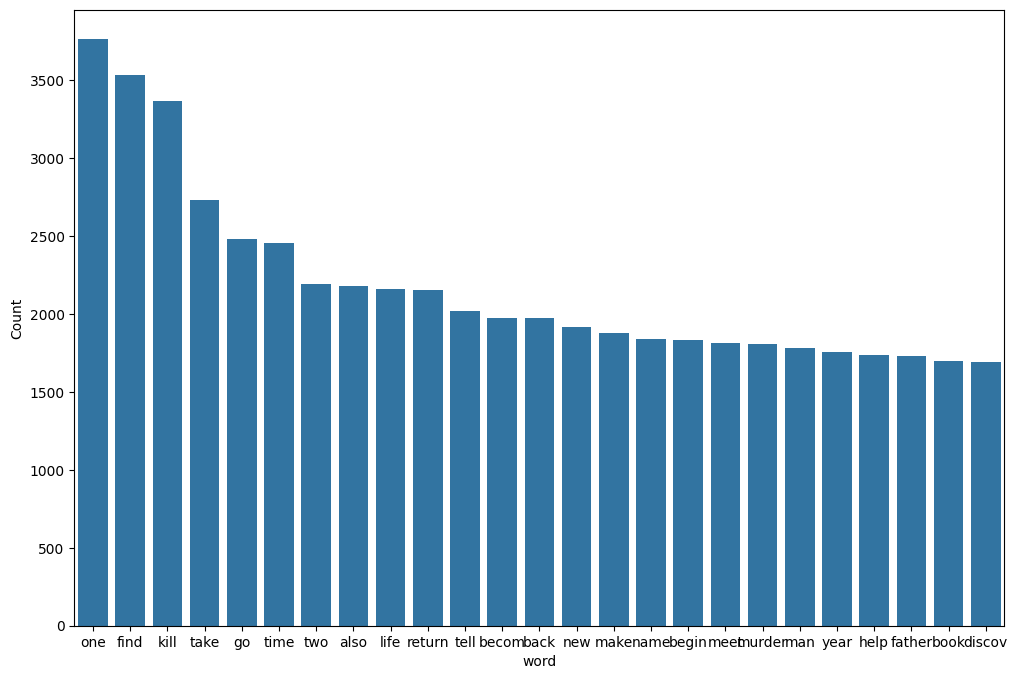

In [16]:
#visualising free words

freq_df = showmostfrequentwords(books['summary'],25)

In [17]:
freq_df.sort_values('count',ascending=False).head(10).style.background_gradient(cmap='plasma')

,word,count
241,one,3765
229,find,3533
239,kill,3369
152,take,2733
87,go,2484
1146,time,2459
37,two,2194
412,also,2177
415,life,2161
404,return,2154


## Encoding

In [19]:
books_list = list(books['genre'].unique())
encode = [i for i in range(len(books_list))]
mapper = dict(zip(books_list, encode))
print(mapper)

{'Fantasy': 0, 'Science Fiction': 1, 'Crime Fiction': 2, 'Historical novel': 3, 'Horror': 4, 'Thriller': 5}


In [20]:
books['genre'] = books['genre'].map(mapper)
books['genre'].unique()

array([0, 1, 2, 3, 4, 5])

##Model Building

In [22]:
##count vectoriser

count_vect = CountVectorizer(max_df=0.90, min_df=2, stop_words='english')

bagofword_vec = count_vect.fit_transform(books['summary'])
bagofword_vec

<3000x16855 sparse matrix of type '<class 'numpy.int64'>'
	with 419935 stored elements in Compressed Sparse Row format>

In [23]:
test = books['genre']
X_train, X_test, y_train, y_test = train_test_split(bagofword_vec, test, test_size=0.2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2400, 16855), (600, 16855), (2400,), (600,))

In [24]:
svc = SVC()
svc.fit(X_train, y_train)
svccpred = svc.predict(X_test)
print(metrics.accuracy_score(y_test, svccpred))


0.545


In [27]:
from sklearn.naive_bayes import MultinomialNB
mb = MultinomialNB()
mb.fit(X_train, y_train)
mbpred = mb.predict(X_test)
print(metrics.accuracy_score(y_test, mbpred))


0.73


In [31]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
print(metrics.accuracy_score(y_test, rf.predict(X_test)))

0.6316666666666667


## Part 2- Model Building

Changing from countvectorizer to TFDIF

In [32]:
#labelling each genre with a unique number

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(books['genre'])

X_train, X_test, y_train, y_test = train_test_split(books['summary'],y,test_size=0.2,random_state=50)

X_train.shape, X_test.shape


((2400,), (600,))

In [34]:
#performing tf-idf

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=10000)
xtrain_tfidf = tfidf_vectorizer.fit_transform(X_train.values.astype('U'))
xtest_tfidf = tfidf_vectorizer.transform(X_test.values.astype('U'))


In [35]:
svc = SVC()
svc.fit(xtrain_tfidf, y_train)
svccpred = svc.predict(xtest_tfidf)
print(metrics.accuracy_score(y_test, svccpred))


0.7583333333333333


In [36]:
mb = MultinomialNB()
mb.fit(xtrain_tfidf, y_train)
mbpred = mb.predict(xtest_tfidf)
print(metrics.accuracy_score(y_test, mbpred))

0.77


## Testing Model

In [38]:
def test(text,model):

    text = cleantext(text)
    text = removestopwords(text)
    text = lematizing(text)
    text = stemming(text)

    text_vector = tfidf_vectorizer.transform([text])
    predicted = model.predict(text_vector)
    return predicted

ans = books['summary'].apply(lambda text: test(text, mb))

ans

,summary
0,[0]
1,[0]
2,[0]
3,[0]
4,[0]
...,...
2995,[5]
2996,[5]
2997,[5]
2998,[5]


In [39]:
#method to switch the values to keys

predicted_genres = []
for i in range(len(ans)):
    index_val = ans[i][0]

    predicted_genres.append(list(mapper.keys())[list(mapper.values()).index(index_val)])


In [40]:
mapper

{'Fantasy': 0,
 'Science Fiction': 1,
 'Crime Fiction': 2,
 'Historical novel': 3,
 'Horror': 4,
 'Thriller': 5}

In [43]:
#mapping the training genre as well

newmap = dict([(value,key) for key,value in mapper.items()])
newmap

{0: 'Fantasy',
 1: 'Science Fiction',
 2: 'Crime Fiction',
 3: 'Historical novel',
 4: 'Horror',
 5: 'Thriller'}

In [44]:
print(newmap)

{0: 'Fantasy', 1: 'Science Fiction', 2: 'Crime Fiction', 3: 'Historical novel', 4: 'Horror', 5: 'Thriller'}


In [45]:
books['Actual Genre'] = books['genre'].map(newmap)
books['Predicted Genre'] = np.array(predicted_genres)
books.head()

,book_id,book_name,genre,summary,Actual Genre,Predicted Genre
0,3248537,Drowned Wednesday,0,drown wednesday first truste among morrow day ...,Fantasy,Fantasy
1,27796919,The Lost Hero,0,book open jason awaken school bu unabl rememb ...,Fantasy,Fantasy
2,3910776,The Eyes of the Overworld,0,cugel easili persuad merchant fianosth attempt...,Fantasy,Fantasy
3,5969644,Magic's Promise,0,book open heraldmag vanyel return countri vald...,Fantasy,Fantasy
4,3173445,Taran Wanderer,0,taran gurgi return caer dallben follow event t...,Fantasy,Fantasy


In [46]:
books = books[['book_name', 'summary', 'Actual Genre', 'Predicted Genre']]
books

,book_name,summary,Actual Genre,Predicted Genre
0,Drowned Wednesday,drown wednesday first truste among morrow day ...,Fantasy,Fantasy
1,The Lost Hero,book open jason awaken school bu unabl rememb ...,Fantasy,Fantasy
2,The Eyes of the Overworld,cugel easili persuad merchant fianosth attempt...,Fantasy,Fantasy
3,Magic's Promise,book open heraldmag vanyel return countri vald...,Fantasy,Fantasy
4,Taran Wanderer,taran gurgi return caer dallben follow event t...,Fantasy,Fantasy
...,...,...,...,...
2995,White Death,novel numa file kurt austin adventur novel mai...,Thriller,Thriller
2996,Venus with Pistol,gilbert kemp dealer special antiqu gun london ...,Thriller,Thriller
2997,Blackwater,know your deep davey alway live shadow older b...,Thriller,Thriller
2998,The Rainbow and the Rose,stori concern life johnni pasco retir commerci...,Thriller,Thriller


In [47]:
dict(Counter(books['Actual Genre'].values))

{'Fantasy': 500,
 'Science Fiction': 500,
 'Crime Fiction': 500,
 'Historical novel': 500,
 'Horror': 500,
 'Thriller': 500}

In [48]:
dict(Counter(books['Predicted Genre'].values))

{'Fantasy': 442,
 'Science Fiction': 521,
 'Horror': 481,
 'Historical novel': 540,
 'Thriller': 466,
 'Crime Fiction': 550}

<function matplotlib.pyplot.xticks(ticks: 'ArrayLike | None' = None, labels: 'Sequence[str] | None' = None, *, minor: 'bool' = False, **kwargs) -> 'tuple[list[Tick] | np.ndarray, list[Text]]'>

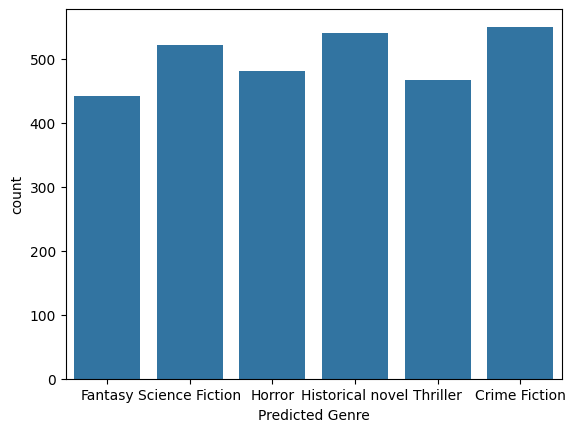

In [51]:
sn.countplot(x = books['Predicted Genre'])
plt.xticks

## Saving the model

In [52]:
#saving the model

import pickle

file = open('bookgenremodel.pkL', 'wb')
pickle.dump(mb, file)
file.close()


In [53]:
books['summary'].iloc[1]

'book open jason awaken school bu unabl rememb anyth past sit next piper mclean leo valdez call name say girlfriend best friend respect three part class field trip grand canyon arriv classmat dylan turn venti storm spirit attack trio trip leader coach gleeson hedg ensu fight jason surpris everyon includ one coin turn sword us battl storm spirit coach hedg reveal satyr fight taken captiv flee spirit battl fli chariot arriv rescu trio one peopl annabeth upset discov miss boyfriend perci jackson expect annabeth seek perci told vision goddess hera look guy one shoe turn jason shoe destroy fight jason piperand leo told demigod taken back camp halfblood meet greek demigod child like leo reveal son hephaestu piper daughter aphrodit jason son zeu though hera tell champion jason later discov full brother zeu demigod daughter thalia grace hunter artemi shortli arriv three given quest rescu hera captur set soon discov enemi work order gaea overthrow god quest encount thalia hunter look perci thal

In [54]:
tfidf_vectorizer

TfidfVectorizer(max_df=0.8, max_features=10000)

In [55]:
file = open('tfidf_vectorizer.pkL', 'wb')
pickle.dump(tfidf_vectorizer, file)
file.close()

In [56]:
wordnet_down = nltk.download('wordnet',download_dir='./')
wordnet_down

[nltk_data] Downloading package wordnet to ./...
[nltk_data]   Package wordnet is already up-to-date!


True

In [57]:
nltk.download('stopwords',download_dir='./')

[nltk_data] Downloading package stopwords to ./...
[nltk_data]   Package stopwords is already up-to-date!


True

In [71]:
%%writefile app.py

import pickle
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
import re
import nltk
from flask import Flask, request, render_template

nltk.download('stopwords')
nltk.download('wordnet')

#cleaning the text removing all unnecessary characters
def cleantext(text):
    # Removing backslashes explicitly
    text = re.sub(r"\\", "", text)

    # Removing quotes (single and double)
    text = re.sub(r"[\"']", "", text)

    # Removing special symbols except letters and spaces
    text = re.sub(r"[^a-zA-Z\s]", "", text)

    # Removing extra whitespaces
    text = ' '.join(text.split())

    # Convert text to lowercase
    text = text.lower()

    return text

#removing the stopwords
def removestopwords(text):

   removestopwords = [word for word in text.split() if word not in stop_words]
   return ' '.join(removestopwords)

#lematizzing the text
def lematizing(sentence):
    stemSentence = ""
    for word in sentence.split():
      stem = lemma.lemmatize(word)
      stemSentence += stem
      stemSentence += " "
    stemSentence = stemSentence.strip()
    return stemSentence

#stemming the text i.e reducing the word size
def stemming(sentence):

    stemmed_sentence = ""
    for word in sentence.split():
        stem = stemmer.stem(word)
        stemmed_sentence += stem
        stemmed_sentence += " "

    stemmed_sentence = stemmed_sentence.strip()
    return stemmed_sentence

#testing the model
def test(text, model, tfidf_vectorizer):

    text = cleantext(text)
    text = removestopwords(text)
    text = lematizing(text)
    text = stemming(text)

    text_vector = tfidf_vectorizer.transform([text])
    predicted = model.predict(text_vector)

    newmapper = {
        0: 'Fantasy',
        1: 'Science Fiction',
        2: 'Crime Fiction',
        3: 'Historical novel',
        4: 'Horror',
        5: 'Thriller'
    }

    return newmapper[predicted[0]]

#training once for tfdif to fit


#loading the model
file = open('bookgenremodel.pkL', 'rb')
mb = pickle.load(file)
file.close()

file1 = open('tfidf_vectorizer.pkL', 'rb')
tfidf_vectorizer = pickle.load(file1)
file1.close()

app = Flask(__name__)

@app.route('/', methods=['GET', 'POST'])
def hello_world():

    if request.method == 'POST':

      mydict = request.form
      text = mydict["summary"]
      prediction = test(text, mb, tfidf_vectorizer)

      return render_template('index.html', genre=prediction, text=str(text)[:100], showresult=True)

if __name__ == '__main__':
    app.run()

Overwriting app.py


## To run the flask

In [ ]:
!python app.py


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
 * Serving Flask app 'app'
 * Debug mode: off
 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
